#### 2.1 Any of you who have listened to children tell stories will recognize that children differ from adults in that they tend to recall stories as a sequence of actions rather than as an overall plot. Their descriptions of a movie are filled with the phrase “and then. . . .” An experimenter with supreme patience asked 50 children to tell her about a given movie. Among other variables, she counted the number of “and then. . .” statements, which is the dependent variable. The data follow:

data = [10, 11, 12, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 31, 40]

a. Plot an ungrouped frequency distribution for these data.

b. What is the general shape of the distribution?

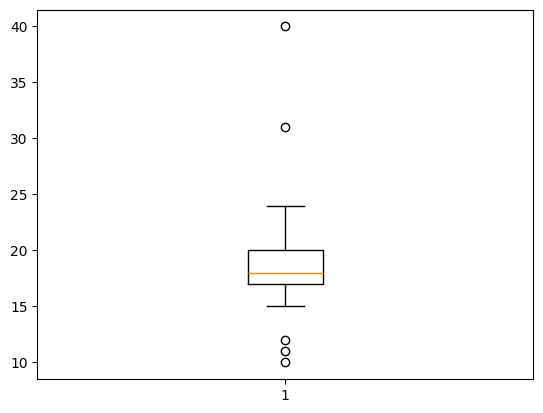

In [7]:
import matplotlib.pyplot as plt
data = [10, 11, 12, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 31, 40]
plt.boxplot(data)
plt.show()

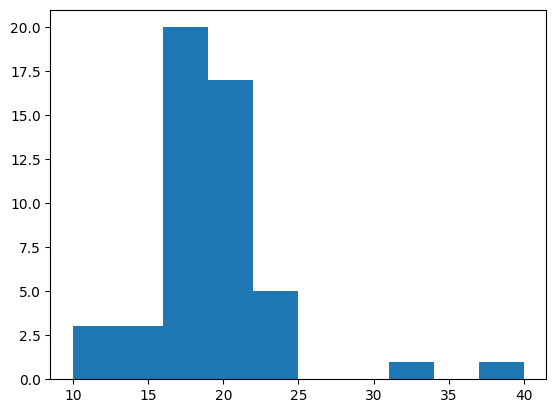

In [10]:
plt.hist(data)
plt.show()